In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

### example data

In [2]:
df = pd.read_csv('titanic.csv')
df.shape

(891, 15)

In [3]:
tbl0 = df.head(5)
tbl0

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: ylabel='Frequency'>

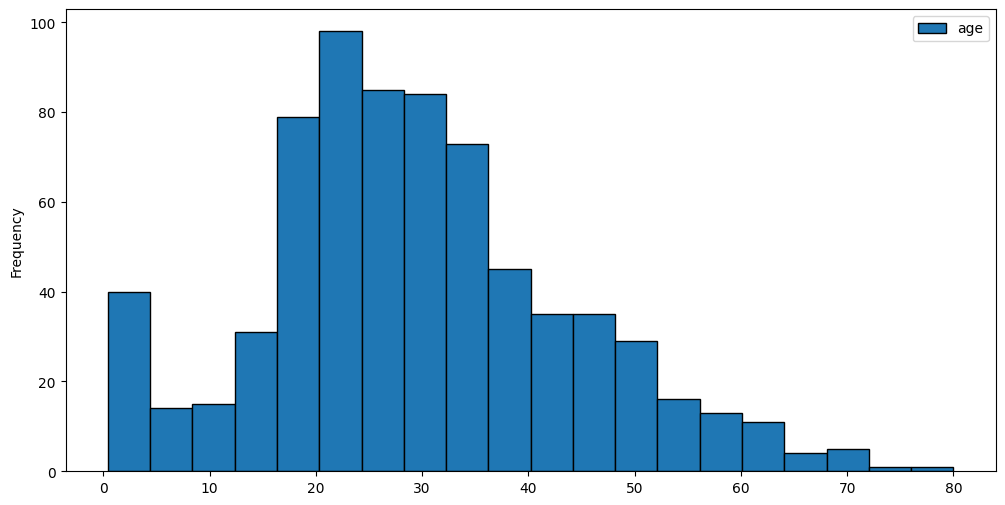

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df.plot(kind="hist", y="age", bins=20, edgecolor="black", ax = ax)

In [5]:
tbl: pd.DataFrame = df.groupby(["sex", "class"], dropna=False, observed=False).agg(
    **{
        "n": ("sex", "size"),
        "survived_rate": ("survived", "mean"),
    }
).reset_index()
tbl

,sex,class,n,survived_rate
0,female,First,94,0.968085
1,female,Second,76,0.921053
2,female,Third,144,0.500000
3,male,First,122,0.368852
4,male,Second,108,0.157407
5,male,Third,347,0.135447


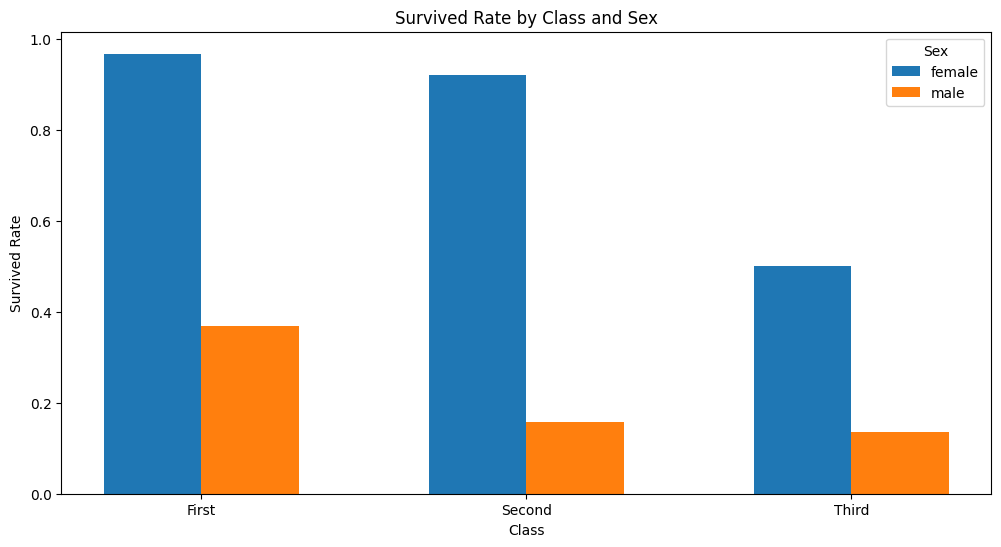

In [6]:
fig2, ax = plt.subplots(1, 1, figsize=(12, 6))

classes = tbl['class'].unique()
sexes = tbl['sex'].unique()
x = np.arange(len(classes))  # the label locations
width = 0.3  # width of the bars

for i, sex in enumerate(sexes):
    values = tbl[tbl['sex'] == sex].set_index('class').loc[classes, 'survived_rate']
    ax.bar(x + i*width, values, width, label=sex)

ax.set_xlabel('Class')
ax.set_ylabel('Survived Rate')
ax.set_title('Survived Rate by Class and Sex')
ax.set_xticks(x + width/2)
ax.set_xticklabels(classes)
ax.legend(title='Sex')
plt.show()

In [7]:
tbl2 = tbl.pivot(
    index = 'class',
    columns = 'sex',
    values = 'survived_rate'
).reset_index().round(3)
tbl2

sex,class,female,male
0,First,0.968,0.369
1,Second,0.921,0.157
2,Third,0.500,0.135


### writing df to excel

In [8]:
from excel_writer import ExcelWriter
from pathlib import Path

In [9]:
with ExcelWriter(file_path=Path("output/test.xlsx")) as ew:
    (
        ew
        .write_df(tbl0, title="Table 0: Head of DataFrame")
        .write_df(tbl, title="Table 1: Grouped DataFrame")
        .write_df(tbl2, title="Table 2: Pivoted DataFrame")
        .switch_to_sheet("Sheet2", create_if_not_exists=True)
        .write_df(tbl0, title="Table 0: Head of DataFrame")
        .write_df(tbl, title="Table 1: Grouped DataFrame")
    )


2025-08-03 15:22:04.165 | DEBUG    | excel_writer:__enter__:109 - Enter ExcelWriter: mode = 'w'
2025-08-03 15:22:04.168 | DEBUG    | excel_writer:switch_to_sheet:142 - Sheet Sheet does not exist, creating it.
2025-08-03 15:22:04.169 | DEBUG    | excel_writer:_make_new_sheet:128 - Creating new sheet: Sheet
2025-08-03 15:22:04.170 | DEBUG    | excel_writer:switch_to_sheet:145 - Switching to sheet: Sheet
2025-08-03 15:22:04.171 | DEBUG    | excel_writer:_reset_cursor:156 - Resetting cursor to 1, 1
2025-08-03 15:22:04.171 | DEBUG    | excel_writer:write_df:163 - Writing Table 0: Head of DataFrame on Sheet at R1, C1
2025-08-03 15:22:04.178 | DEBUG    | excel_writer:write_df:163 - Writing Table 1: Grouped DataFrame on Sheet at R9, C1
2025-08-03 15:22:04.180 | DEBUG    | excel_writer:write_df:163 - Writing Table 2: Pivoted DataFrame on Sheet at R18, C1
2025-08-03 15:22:04.181 | DEBUG    | excel_writer:switch_to_sheet:142 - Sheet Sheet2 does not exist, creating it.
2025-08-03 15:22:04.182 | DE

In [10]:
ew = ExcelWriter(file_path=Path("output/test2.xlsx"))
ew.write_df(tbl0, title="Table 0: Head of DataFrame")

2025-08-03 15:22:04.235 | DEBUG    | excel_writer:new_func:24 - ExcelWriter is not open, opening it now for this method.
2025-08-03 15:22:04.236 | DEBUG    | excel_writer:__enter__:109 - Enter ExcelWriter: mode = 'w'
2025-08-03 15:22:04.238 | DEBUG    | excel_writer:switch_to_sheet:142 - Sheet Sheet does not exist, creating it.
2025-08-03 15:22:04.238 | DEBUG    | excel_writer:_make_new_sheet:128 - Creating new sheet: Sheet
2025-08-03 15:22:04.239 | DEBUG    | excel_writer:switch_to_sheet:145 - Switching to sheet: Sheet
2025-08-03 15:22:04.240 | DEBUG    | excel_writer:_reset_cursor:156 - Resetting cursor to 1, 1
2025-08-03 15:22:04.241 | DEBUG    | excel_writer:write_df:163 - Writing Table 0: Head of DataFrame on Sheet at R1, C1
2025-08-03 15:22:04.244 | DEBUG    | excel_writer:__exit__:123 - Exit ExcelWriter


ExcelWriter(file_path='output\test2.xlsx', mode = w, sheet_name=Sheet), cur_row=9, cur_col=1, distance_bw_contents=2)

In [11]:
ew = ExcelWriter(file_path=Path("output/test3.xlsx"))
ew.write_df(tbl0, title="Table 0: Head of DataFrame")
ew.write_df(tbl, title="Table 1: Grouped DataFrame")
ew.write_df(tbl2, title="Table 2: Pivoted DataFrame")
ew.switch_to_sheet("Sheet2", create_if_not_exists=True)
ew.write_df(tbl0, title="Table 0: Head of DataFrame")
ew.write_df(tbl, title="Table 1: Grouped DataFrame")


2025-08-03 15:22:04.265 | DEBUG    | excel_writer:new_func:24 - ExcelWriter is not open, opening it now for this method.
2025-08-03 15:22:04.266 | DEBUG    | excel_writer:__enter__:109 - Enter ExcelWriter: mode = 'w'
2025-08-03 15:22:04.268 | DEBUG    | excel_writer:switch_to_sheet:142 - Sheet Sheet does not exist, creating it.
2025-08-03 15:22:04.269 | DEBUG    | excel_writer:_make_new_sheet:128 - Creating new sheet: Sheet
2025-08-03 15:22:04.270 | DEBUG    | excel_writer:switch_to_sheet:145 - Switching to sheet: Sheet
2025-08-03 15:22:04.270 | DEBUG    | excel_writer:_reset_cursor:156 - Resetting cursor to 1, 1
2025-08-03 15:22:04.271 | DEBUG    | excel_writer:write_df:163 - Writing Table 0: Head of DataFrame on Sheet at R1, C1
2025-08-03 15:22:04.272 | DEBUG    | excel_writer:__exit__:123 - Exit ExcelWriter
2025-08-03 15:22:04.281 | DEBUG    | excel_writer:new_func:24 - ExcelWriter is not open, opening it now for this method.
2025-08-03 15:22:04.282 | DEBUG    | excel_writer:__enter

ExcelWriter(file_path='output\test3.xlsx', mode = w, sheet_name=Sheet2), cur_row=18, cur_col=1, distance_bw_contents=2)

In [12]:
# # write df to a sheet top left in Excel file
# with pd.ExcelWriter("output/output0.xlsx") as writer:
#     tbl.to_excel(writer, sheet_name="table 1", index=False)

### writing plots to Excel

In [14]:
with ExcelWriter(file_path=Path("output/plot.xlsx")) as ew:
    (
        ew
        .write_plot(fig, title="Figure 0: Head of DataFrame")
        .write_plot(fig, title="Figure 1: Grouped DataFrame")
        .switch_to_sheet("Sheet2", create_if_not_exists=True)
        .write_plot(fig, title="Figure 0: Head of DataFrame")
    )


2025-08-03 15:22:21.315 | DEBUG    | excel_writer:__enter__:109 - Enter ExcelWriter: mode = 'w'
2025-08-03 15:22:21.317 | DEBUG    | excel_writer:switch_to_sheet:142 - Sheet Sheet does not exist, creating it.
2025-08-03 15:22:21.317 | DEBUG    | excel_writer:_make_new_sheet:128 - Creating new sheet: Sheet
2025-08-03 15:22:21.318 | DEBUG    | excel_writer:switch_to_sheet:145 - Switching to sheet: Sheet
2025-08-03 15:22:21.319 | DEBUG    | excel_writer:_reset_cursor:156 - Resetting cursor to 1, 1
2025-08-03 15:22:21.394 | DEBUG    | excel_writer:switch_to_sheet:142 - Sheet Sheet2 does not exist, creating it.
2025-08-03 15:22:21.395 | DEBUG    | excel_writer:_make_new_sheet:128 - Creating new sheet: Sheet2
2025-08-03 15:22:21.396 | DEBUG    | excel_writer:switch_to_sheet:145 - Switching to sheet: Sheet2
2025-08-03 15:22:21.396 | DEBUG    | excel_writer:_reset_cursor:156 - Resetting cursor to 1, 1
2025-08-03 15:22:21.423 | DEBUG    | excel_writer:__exit__:123 - Exit ExcelWriter


In [15]:
ew = ExcelWriter(file_path=Path("output/plot2.xlsx"))
ew.write_plot(fig, title="Figure 0: Head of DataFrame")
ew.write_plot(fig, title="Figure 1: Grouped DataFrame")
ew.switch_to_sheet("Sheet2", create_if_not_exists=True)
ew.write_plot(fig, title="Figure 0: Head of DataFrame")

2025-08-03 15:23:46.117 | DEBUG    | excel_writer:new_func:24 - ExcelWriter is not open, opening it now for this method.
2025-08-03 15:23:46.118 | DEBUG    | excel_writer:__enter__:107 - File output\plot2.xlsx does not exist, force mode w.
2025-08-03 15:23:46.118 | DEBUG    | excel_writer:__enter__:109 - Enter ExcelWriter: mode = 'w'
2025-08-03 15:23:46.120 | DEBUG    | excel_writer:switch_to_sheet:142 - Sheet Sheet does not exist, creating it.
2025-08-03 15:23:46.121 | DEBUG    | excel_writer:_make_new_sheet:128 - Creating new sheet: Sheet
2025-08-03 15:23:46.122 | DEBUG    | excel_writer:switch_to_sheet:145 - Switching to sheet: Sheet
2025-08-03 15:23:46.123 | DEBUG    | excel_writer:_reset_cursor:156 - Resetting cursor to 1, 1
2025-08-03 15:23:46.158 | DEBUG    | excel_writer:__exit__:123 - Exit ExcelWriter
2025-08-03 15:23:46.168 | DEBUG    | excel_writer:new_func:24 - ExcelWriter is not open, opening it now for this method.
2025-08-03 15:23:46.169 | DEBUG    | excel_writer:__enter

ExcelWriter(file_path='output\plot2.xlsx', mode = w, sheet_name=Sheet2), cur_row=34, cur_col=1, distance_bw_contents=2)

In [ ]:
# import io
# from openpyxl.drawing.image import Image as XLImage

# def fig_to_img(fig):
#     buf = io.BytesIO()
#     fig.savefig(buf, format='png')
#     buf.seek(0)
#     img = XLImage(buf)
#     return img

In [ ]:
# fig.get_size_inches()
# # 6inch, 30 r
# rows_per_inch = 5
# # 12inch, 19 c
# cols_per_inch = 1.6

In [ ]:
# # write a plot to a sheet in Excel file
# import openpyxl

# def ref_from_rc(row, col):
#     return openpyxl.utils.get_column_letter(col) + str(row)

# wb = openpyxl.Workbook()
# wb.create_sheet("plots")
# wb.remove(wb["Sheet"])

# fig_height = int(fig.get_size_inches()[1] * rows_per_inch)
# fig_width = int(fig.get_size_inches()[0] * cols_per_inch)
# distance_bw_plots = 2

# cur_row, cur_col =1,1
# wb["plots"].cell(row=cur_row, column=cur_col, value="Plot 1: Histogram of Age")
# cur_row += 1
# wb["plots"].add_image(fig_to_img(fig), ref_from_rc(cur_row,cur_col))

# cur_row += fig_height + distance_bw_plots
# wb["plots"].cell(row=cur_row, column=cur_col, value="Plot 2: Histogram of Age")
# cur_row += 1
# wb["plots"].add_image(fig_to_img(fig), ref_from_rc(cur_row,cur_col))

# wb.save("output/plot_example.xlsx")

### write text